In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

# Definimos una función para calcular el coeficiente de expansión térmica
def calcular_alpha(delta_L, L0, T_inicial, T_final):
    delta_T = T_final - T_inicial
    alpha = delta_L / (L0 * delta_T)
    return alpha

# Datos para cada material
materiales = {
    'Aluminio': {
        'L0': 700,  # mm
        'delta_L': 1.12,  # mm
        'T_inicial_izq': 25.5,
        'T_inicial_der': 25.4,
        'T_final_izq': 73.9,
        'T_final_der': 73.9
    },
    'Cobre': {
        'L0': 700,
        'delta_L': 1.00,
        'T_inicial_izq': 25.3,
        'T_inicial_der': 25.2,
        'T_final_izq': 74.2,
        'T_final_der': 74.1
    },
    'Hierro': {
        'L0': 700,
        'delta_L': 0.88,
        'T_inicial_izq': 25.2,
        'T_inicial_der': 25.1,
        'T_final_izq': 75.0,
        'T_final_der': 74.9
    }
}

# Calculamos alpha para cada material usando ambos métodos
for material, datos in materiales.items():
    L0 = datos['L0']
    delta_L = datos['delta_L']
    
    # Temperaturas iniciales y finales
    T_iniciales = np.array([datos['T_inicial_izq'], datos['T_inicial_der']])
    T_finales = np.array([datos['T_final_izq'], datos['T_final_der']])
    
    # a) Usando el promedio de las temperaturas
    T_inicial_prom = np.mean(T_iniciales)
    T_final_prom = np.mean(T_finales)
    alpha_prom = calcular_alpha(delta_L, L0, T_inicial_prom, T_final_prom)
    
    # b) Usando la temperatura mayor
    T_inicial_max = np.max(T_iniciales)
    T_final_max = np.max(T_finales)
    alpha_max = calcular_alpha(delta_L, L0, T_inicial_max, T_final_max)
    
    print(f"Material: {material}")
    print(f"  Coeficiente de expansión térmica (promedio): {alpha_prom:.6e} 1/°C")
    print(f"  Coeficiente de expansión térmica (máxima):  {alpha_max:.6e} 1/°C\n")


Material: Aluminio
  Coeficiente de expansión térmica (promedio): 3.302374e-05 1/°C
  Coeficiente de expansión térmica (máxima):  3.305785e-05 1/°C

Material: Cobre
  Coeficiente de expansión térmica (promedio): 2.921414e-05 1/°C
  Coeficiente de expansión térmica (máxima):  2.921414e-05 1/°C

Material: Hierro
  Coeficiente de expansión térmica (promedio): 2.524383e-05 1/°C
  Coeficiente de expansión térmica (máxima):  2.524383e-05 1/°C



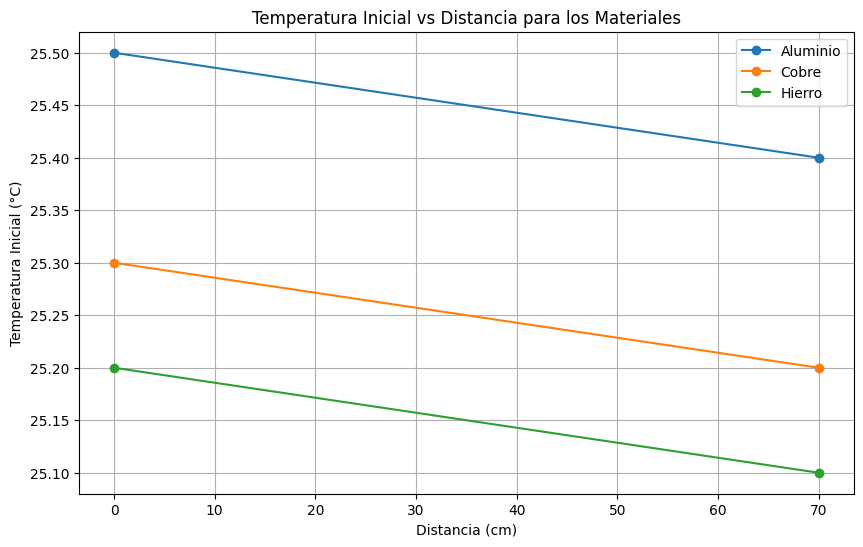

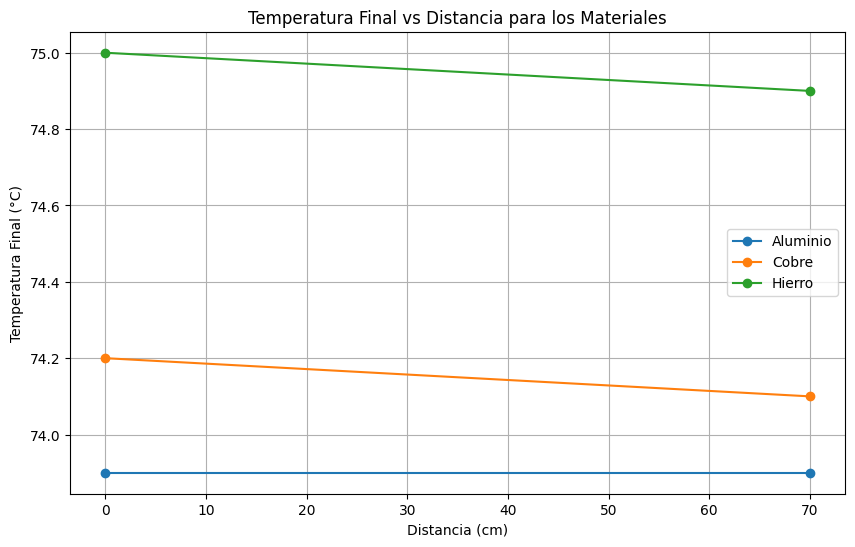

In [2]:
# Definimos las posiciones de las termocuplas
posiciones = np.array([0, 70])  # cm

# Preparar los datos para la gráfica inicial
plt.figure(figsize=(10, 6))
for material, datos in materiales.items():
    T_iniciales = np.array([datos['T_inicial_izq'], datos['T_inicial_der']])
    plt.plot(posiciones, T_iniciales, marker='o', label=material)
plt.title("Temperatura Inicial vs Distancia para los Materiales")
plt.xlabel('Distancia (cm)')
plt.ylabel('Temperatura Inicial (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Preparar los datos para la gráfica final
plt.figure(figsize=(10, 6))
for material, datos in materiales.items():
    T_finales = np.array([datos['T_final_izq'], datos['T_final_der']])
    plt.plot(posiciones, T_finales, marker='o', label=material)
plt.title("Temperatura Final vs Distancia para los Materiales")
plt.xlabel('Distancia (cm)')
plt.ylabel('Temperatura Final (°C)')
plt.legend()
plt.grid(True)
plt.show()
